# **Bike Sharing Demand** 

https://www.kaggle.com/competitions/bike-sharing-demand/data

**META DATA**
<pre>

Data Fields


datetime - hourly date + timestamp  
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
holiday - whether the day is considered a holiday
workingday - whether the day is neither a weekend nor holiday
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
temp - temperature in Celsius
atemp - "feels like" temperature in Celsius
humidity - relative humidity
windspeed - wind speed
casual - number of non-registered user rentals initiated
registered - number of registered user rentals initiated
count - number of total rentals

datetime - 시간별 날짜 + 타임스탬프  
season - 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울 
holiday - 해당 요일을 휴일
workingday - 요일이 주말이나 휴일 날씨가 아닌지
weather
1: 맑음, 약간 구름, 부분 흐림, 부분 흐림
2: 안개 + 흐림, 안개 + 부서진 구름, 안개 + 약간 구름, 안개
3: 가벼운 눈, 약한 비 + 뇌우 + 흩어진 구름, 약한 비 + 흩어진 구름
4: 폭우 + 얼음 팔레트 + 뇌우 + 안개, 눈 + 안개 
temp - 섭씨 온도
atemp - 섭씨 온도
humidity - 상대습도
windspeed - 풍속
casual - 미등록 사용자 대여 시작 수
registered - 등록 사용자 대여 시작
<b>count - 총 대여 수 => Target Feature </b>
</pre>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# sns.color_palette("husl", 9)
sns.set()
#이제부터 seaborn 테마로 그릴거야(default가 격자 그리드)


#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic' # rcParams : 고정설정
plt.rcParams['axes.unicode_minus'] = False #유니코드(특수기호) 엑박 뜨게 하지 마세요.
# sns.set()

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
import warnings
warnings.filterwarnings(action = 'ignore')

In [4]:
tr = pd.read_csv('./train.csv') #로드! np, pd import
tr.columns = tr.columns.str.lower() #작업하기 편하게 컬럼명 소문자로 변경
tr.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
test = pd.read_csv('./test.csv') #로드! np, pd import
test.columns = test.columns.str.lower() #작업하기 편하게 컬럼명 소문자로 변경
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


* 만약에 컬럼 리스트가 있다면..?
>tr.columns = ['컬럼명','컬럼명','컬럼명','컬럼명',..]
 이런식으로 넣어줘도 컬럼은 바뀐다.

다만, 컬럼 갯수는 맞춰야 에러나지 않는다.

* 일반적으로 Data road할 때, 날짜로 변경하지만(parse_dates=['date_time']) 연습을 위해 보류

In [6]:
tr.info()

#결측이 없다. 오브젝트는 있다.

#날짜로 바꿀 수 있지만(parse_dates[]), 연습을 위해 보류
#datetime 컬럼이름이 예약어라서 rename할 것

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


# Rename
* datetime은 보통 예약어이기 때문에, 컬럼이름을 변경해준다.

> <font color = blue>df.rename(columns = {'old_nm' : 'new_nm'}, inplace = True)

In [7]:
tr.rename(columns = {'datetime' : 'regdate'}, inplace = True)

In [8]:
test.rename(columns = {'datetime' : 'regdate'}, inplace = True)

# 구조확인 3종
    - df.head()
    - df.info()
    - df.shape : 필요할 때

## 결측 체크

In [9]:
tr.isna().sum().value_counts()

0    12
dtype: int64

## Object 체크

In [10]:
tr.select_dtypes('object').columns

Index(['regdate'], dtype='object')

### regdate 포맷(타입) 변환
    - object(str) ---> datetime

In [11]:
from datetime import datetime

In [12]:
datetime.strptime('2020-12-14 20:12:59','%Y-%m-%d %H:%M:%S')

#글자를 날짜로

datetime.datetime(2020, 12, 14, 20, 12, 59)

In [13]:
datetime.fromisoformat('2020-12-14 20:12:59')

#글자를 날짜로

datetime.datetime(2020, 12, 14, 20, 12, 59)

* Dataframe '2020-01-01' ------> datetime.datetime(2020,1,1)

### 기타 방법
    - pd.read_csv(..parse_dates=[컬럼명])
    - pd.to_datetime(df[컬럼])
    -df[].astype('datetime64')

In [14]:
tr['regdate_datetype22']=pd.to_datetime(tr['regdate'])
tr.head(2)

,regdate,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,regdate_datetype22
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00


In [15]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   regdate             10886 non-null  object        
 1   season              10886 non-null  int64         
 2   holiday             10886 non-null  int64         
 3   workingday          10886 non-null  int64         
 4   weather             10886 non-null  int64         
 5   temp                10886 non-null  float64       
 6   atemp               10886 non-null  float64       
 7   humidity            10886 non-null  int64         
 8   windspeed           10886 non-null  float64       
 9   casual              10886 non-null  int64         
 10  registered          10886 non-null  int64         
 11  count               10886 non-null  int64         
 12  regdate_datetype22  10886 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(8), ob

In [16]:
tr['regdate_datetype33']=tr['regdate'].apply(lambda x : datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
tr.head(2)

#바꾼 값을 전체에 적용해라 : 람다

,regdate,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,regdate_datetype22,regdate_datetype33
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00,2011-01-01 00:00:00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00,2011-01-01 01:00:00


In [17]:
tr['regdate44']= tr['regdate'].astype('datetime64[ns]')
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   regdate             10886 non-null  object        
 1   season              10886 non-null  int64         
 2   holiday             10886 non-null  int64         
 3   workingday          10886 non-null  int64         
 4   weather             10886 non-null  int64         
 5   temp                10886 non-null  float64       
 6   atemp               10886 non-null  float64       
 7   humidity            10886 non-null  int64         
 8   windspeed           10886 non-null  float64       
 9   casual              10886 non-null  int64         
 10  registered          10886 non-null  int64         
 11  count               10886 non-null  int64         
 12  regdate_datetype22  10886 non-null  datetime64[ns]
 13  regdate_datetype33  10886 non-null  datetime64

## Shape 체크

In [18]:
tr.shape

(10886, 15)

# EDA 시작

In [19]:
tr = pd.read_csv('./train.csv', parse_dates=["datetime"]) #로드! np, pd import
tr.columns = tr.columns.str.lower() #작업하기 편하게 컬럼명 소문자로 변경
tr.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [20]:
test = pd.read_csv('./test.csv', parse_dates=["datetime"]) #로드! np, pd import
test.columns = test.columns.str.lower() #작업하기 편하게 컬럼명 소문자로 변경
test.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000


In [21]:
tr.rename(columns = {'datetime' : 'regdate','count':'regcount'}, inplace = True)
tr.head(2)

,regdate,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,regcount
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [22]:
test.rename(columns = {'datetime' : 'regdate'}, inplace = True)
test.head(2)

,regdate,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000


In [23]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   regdate     10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  regcount    10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


## regdate

In [24]:
from datetime import datetime, date

In [25]:
tr['regdate'].head()

0   2011-01-01 00:00:00
1   2011-01-01 01:00:00
2   2011-01-01 02:00:00
3   2011-01-01 03:00:00
4   2011-01-01 04:00:00
Name: regdate, dtype: datetime64[ns]

In [26]:
tr['regdate']

tr['y'] = tr['regdate'].dt.year #.dt 시간으로 처리해주세요(ex. .str)
tr['m'] = tr['regdate'].dt.month
tr['d'] = tr['regdate'].dt.day
tr['h'] = tr['regdate'].dt.hour

In [27]:
test['regdate']

test['y'] = test['regdate'].dt.year #.dt 시간으로 처리해주세요(ex. .str)
test['m'] = test['regdate'].dt.month
test['d'] = test['regdate'].dt.day
test['h'] = test['regdate'].dt.hour

In [28]:
tr['regdate']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: regdate, Length: 10886, dtype: datetime64[ns]

In [29]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   regdate     10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  regcount    10886 non-null  int64         
 12  y           10886 non-null  int64         
 13  m           10886 non-null  int64         
 14  d           10886 non-null  int64         
 15  h           10886 non-null  int64         
dtypes: datetime64[ns](1), 

## 인덱스 지정

* regdate 컬럼을 index 값으로 변환 : 컴퓨터는 index를 학습에서 제외하기 때문에
* 버리지 않는 이유? 필요하면 나중에 꺼내서 값으로 쓰려고

In [30]:
tr = tr.set_index('regdate')
tr.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,regcount,y,m,d,h
regdate,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


## 인덱스에서 빼내기

In [31]:
# tr = tr.reset_index('regdate')
# tr.head()

#여러번 하면 다른 인덱스가 빠지니까 한 번만

* 시간을 인덱스로 하는 또 다른 이유 : x축이 날짜여야 시계열 분석이 가능하다. 포맷 관계 없이

##  casual,    registered       ,  count

In [32]:
tr[(tr['casual']+tr['registered']) != tr['regcount']].shape

(0, 15)

* 합산인 count만 살려놓거나, 각 값인 casual, registerd 만 살려놓거나
* 정답 제출했을 때 점수 높은 애들로 놓는다.
* 그냥 계속 다시 재시도만이 답이다.

# 본격 EDA

해당 각 수치형 컬럼에 대해서 histplot 등.. 찾아서 그려보자.

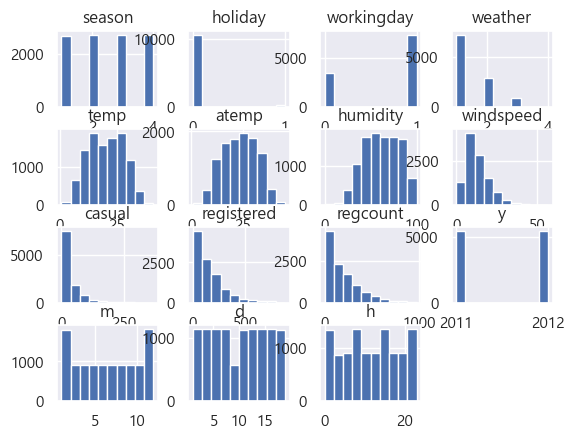

In [33]:
#가장 간편한 방법
# 이산형 모든 피쳐

tr.hist()
plt.show()

## seaborn으로 만들기

In [34]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  regcount    10886 non-null  int64  
 11  y           10886 non-null  int64  
 12  m           10886 non-null  int64  
 13  d           10886 non-null  int64  
 14  h           10886 non-null  int64  
dtypes: float64(3), int64(12)
memory usage: 1.3 MB


In [35]:
tr.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'regcount', 'y', 'm',
       'd', 'h'],
      dtype='object')

In [36]:
for i, col in enumerate(tr) :
    r = i//4
    c = i%3
    print(i, r,c, col)

0 0 0 season
1 0 1 holiday
2 0 2 workingday
3 0 0 weather
4 1 1 temp
5 1 2 atemp
6 1 0 humidity
7 1 1 windspeed
8 2 2 casual
9 2 0 registered
10 2 1 regcount
11 2 2 y
12 3 0 m
13 3 1 d
14 3 2 h


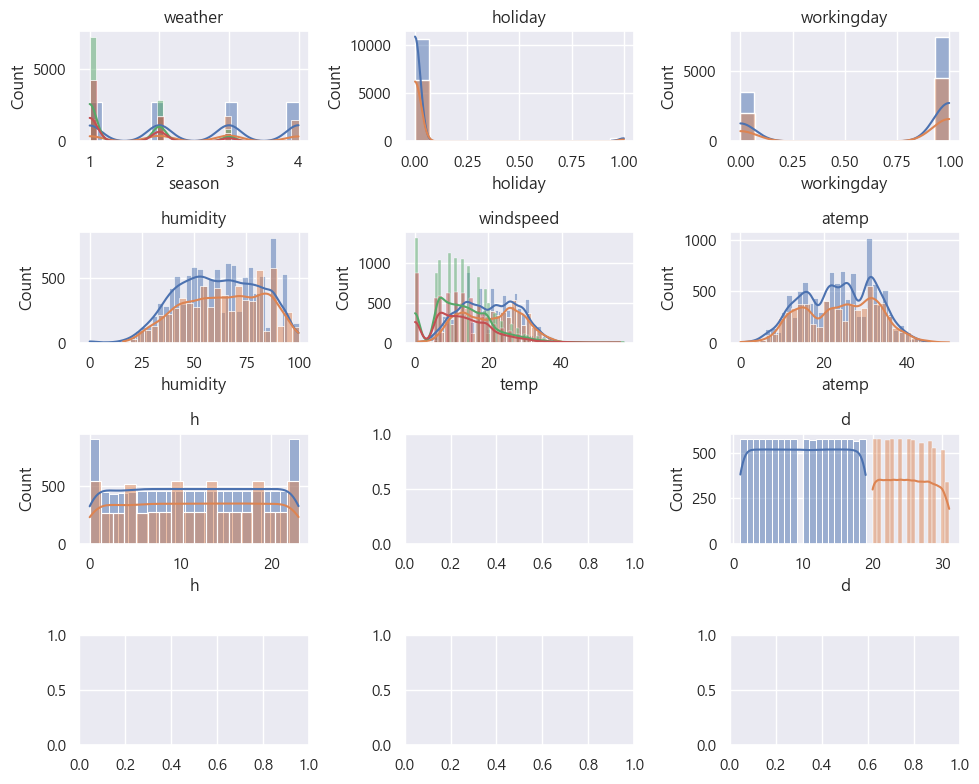

In [37]:

fig, axes = plt.subplots(4, 3,figsize=(10,8) ) 
col_list = [ 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'd','h']

for i, col in enumerate(col_list) :
    r = i//4
    c = i%3
    # print(i,col)
    axes[r][c].set_title(col)
    sns.histplot(data = tr, x=col, ax = axes[r][c], kde= True)
    sns.histplot(data = test, x=col, ax = axes[r][c], kde= True)
plt.tight_layout()
plt.show()
    
    

In [38]:
#target eda
# 문법 연습



# fig, axes  = plt.subplots(1, 3, figsize=(9, 3))  #------------1줄 3개칸 
# axes[0].set_title('casual')
# sns.histplot(data = tr, x = 'casual', ax=axes[0])
# axes[1].set_title('registered')
# sns.histplot(data = tr, x = 'registered', ax=axes[1])
# axes[2].set_title('count')
# sns.histplot(data = tr, x = 'count', ax=axes[1])
# plt.show()


* 계절성 관련해서 barplot

In [39]:
# group_list = ['y','m','d','h']
# sns.barplot(data=tr,
#             x='group_list', y='season',

#             estimator='count',
#             errorbar=('ci', 95), 
#             saturation=0.75,
#             width=0.8,
#             errcolor='.26',
#             dodge=True, 
#             ci='deprecated',
#             ax=None)

In [40]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  regcount    10886 non-null  int64  
 11  y           10886 non-null  int64  
 12  m           10886 non-null  int64  
 13  d           10886 non-null  int64  
 14  h           10886 non-null  int64  
dtypes: float64(3), int64(12)
memory usage: 1.3 MB


In [41]:
tr.index.values

array(['2011-01-01T00:00:00.000000000', '2011-01-01T01:00:00.000000000',
       '2011-01-01T02:00:00.000000000', ...,
       '2012-12-19T21:00:00.000000000', '2012-12-19T22:00:00.000000000',
       '2012-12-19T23:00:00.000000000'], dtype='datetime64[ns]')

In [42]:
tr['week'] = tr.index.dayofweek

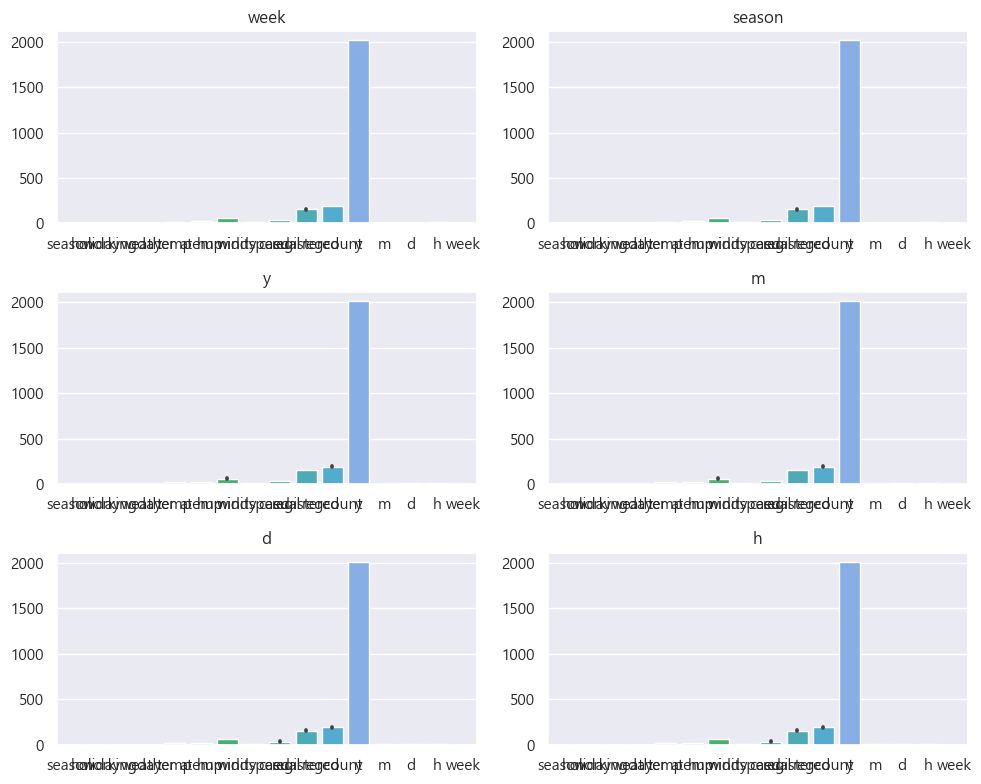

In [43]:
fig, axes = plt.subplots(3, 2 , figsize=(10,8)) 
col_list = [ 'week','season','y', 'm', 'd','h']

for i, col in enumerate(col_list) :
    r = i//2
    c = i%2
    # print(i,col)
    axes[r][c].set_title(col)
    sns.barplot(data = tr,  ax = axes[r][c])

plt.tight_layout()
plt.show()

In [44]:


# fig, axes = plt.subplots(3, 2 , figsize=(10,8)) 
# col_list = [ 'week','season','y', 'm', 'd','h']

# for i, col in enumerate(col_list) :
#     r = i//2
#     c = i%2
#     # print(i,col)
#     axes[r][c].set_title(col)
#     sns.barplot(data = tr, x=col, y ='regcount', estimator='',ax = axes[r][c])

# plt.tight_layout()
# plt.show()
    
    

* 우리가 궁금한 것은 단순 count가 아니라 시즌별로 몇 건의 대여를 했는지 regcount가 궁금한 것이다.

* holiday workingday 비교하기

In [45]:
tr['week'].head()

regdate
2011-01-01 00:00:00    5
2011-01-01 01:00:00    5
2011-01-01 02:00:00    5
2011-01-01 03:00:00    5
2011-01-01 04:00:00    5
Name: week, dtype: int64

In [46]:
tr[['holiday','workingday']].value_counts()

#0,0 = 주말[0]     = 3163
#0,1 = 일하는 날[1] = 7412
#1,0 = 공휴일[2]   = 311

holiday  workingday
0        1             7412
         0             3163
1        0              311
dtype: int64

In [47]:
tr['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [48]:

idx1 = tr[(tr['holiday']==0)&(tr['workingday']==0)].index
idx2 = tr[(tr['holiday']==0)&(tr['workingday']==1)].index
idx3 = tr[(tr['holiday']==1)&(tr['workingday']==0)].index
idx1

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2012-12-16 14:00:00', '2012-12-16 15:00:00',
               '2012-12-16 16:00:00', '2012-12-16 17:00:00',
               '2012-12-16 18:00:00', '2012-12-16 19:00:00',
               '2012-12-16 20:00:00', '2012-12-16 21:00:00',
               '2012-12-16 22:00:00', '2012-12-16 23:00:00'],
              dtype='datetime64[ns]', name='regdate', length=3163, freq=None)

In [49]:
tr['date_type'] = [[(tr['holiday']==0)&(tr['workingday']==0) == True]] == 0

In [50]:
# tr['date_type'] = [[(tr['holiday']==0)&(tr['workingday']==1) == True]] == 1
tr.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,regcount,y,m,d,h,week,date_type
regdate,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5,False
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5,False
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5,False
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5,False
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5,False


In [51]:
# tr['date_type'] = [[(tr['holiday']==1)&(tr['workingday']==0) == True]] == 2

In [52]:
# tr.iloc[idx1,'date_type']==0

tr.loc[idx1,'date_type'] = 0
tr.loc[idx2,'date_type'] = 1
tr.loc[idx3,'date_type'] = 2

tr['date_type'].value_counts()

1    7412
0    3163
2     311
Name: date_type, dtype: int64

In [53]:
tr['day_type1'] = np.where( (tr['workingday']==0)&(tr['holiday']==0) , 0,
                              np.where( (tr['workingday']==1)&(tr['holiday']==0) , 1,
                                       np.where( (tr['workingday']==0)&(tr['holiday']==1) , 2, 3)))

#너무 걸어서 비추

In [54]:
tr['date_type2'] = 0
tr['date_type2'] = np.where( (tr['holiday']==0) & (tr['workingday'] == 1),   1,  tr['date_type'])
tr['date_type2'] = np.where( (tr['holiday']==1) & (tr['workingday'] == 0),   2,  tr['date_type'])
tr

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,regcount,y,m,d,h,week,date_type,day_type1,date_type2
regdate,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,5,0,0,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,5,0,0,0
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,5,0,0,0
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,5,0,0,0
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,2,1,1,1
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,2,1,1,1
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,2,1,1,1


In [55]:


# fig, axes = plt.subplots(2, 1 , figsize=(10,8)) 
# col_list = [ 'holiday','workingday']

# for i, col in enumerate(col_list) :
#     r = i//1
#     c = i%1
    
#     # print(i,col)
#     axes[r][c].set_title(col)
#     sns.countplot(data = tr, x=col ,ax = axes[r][c])

# plt.tight_layout()
# plt.show()
    
    

<AxesSubplot: xlabel='date_type'>

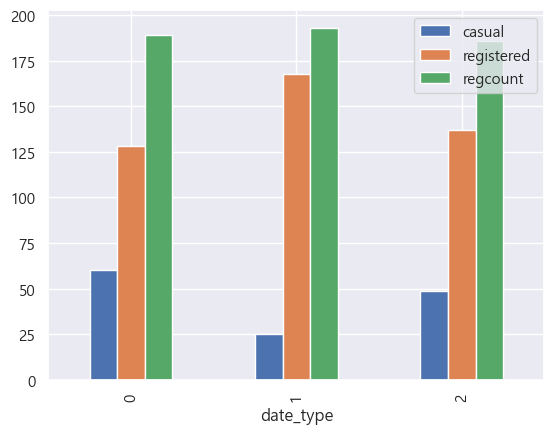

In [56]:
g = tr.groupby('date_type')[['casual','registered','regcount']] #대여수 자체는 별 의미가 없지만, 주말, 평일, 공휴일따라 예약/현장방문 현황이 다르다.
(g.sum() / g.count()).plot(kind = 'bar')

#주말, 평일, 공휴일

In [57]:
#시간대별 평균 대여량

tr.groupby('date_type')['regcount'].mean()

date_type
0    188.765096
1    193.011873
2    185.877814
Name: regcount, dtype: float64

In [58]:
# sns.barplot(data=tr, x="regcount", y="date_type", hue = 'h')

<AxesSubplot: xlabel='h'>

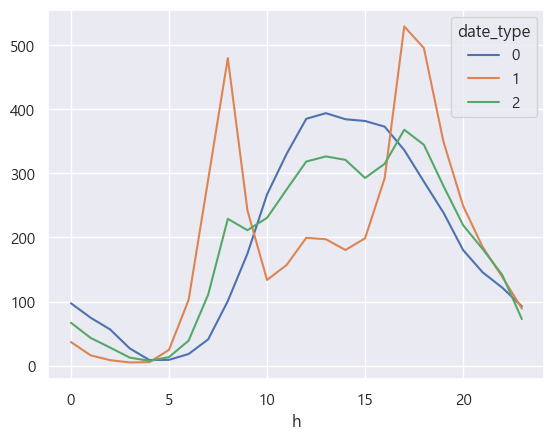

In [59]:
temp = tr.pivot_table(index='h',columns='date_type', values = 'regcount')
temp.plot()

## 시간(h) 별 : 주말 평일 공휴일 대여수

### 주말

        casual  registered    regcount
h                                     
0    17.022727   80.196970   97.219697
1    13.295455   61.439394   74.734848
2    10.769231   45.553846   56.323077
3     6.568182   20.159091   26.727273
4     2.356061    6.303030    8.659091
5     1.837209    7.147287    8.984496
6     3.833333   14.295455   18.128788
7     8.674242   32.318182   40.992424
8    19.818182   80.939394  100.757576
9    45.212121  129.424242  174.636364
10   80.454545  186.628788  267.083333
11  110.848485  219.515152  330.363636
12  132.666667  252.424242  385.090909
13  146.030303  247.840909  393.871212
14  148.659091  235.750000  384.409091
15  147.159091  234.515152  381.674242
16  137.742424  235.106061  372.848485
17  118.916667  217.363636  336.280303
18   88.446970  198.651515  287.098485
19   68.575758  170.037879  238.613636
20   49.356061  130.969697  180.325758
21   37.310606  108.166667  145.477273
22   29.409091   92.166667  121.575758
23   21.196970   71.19697

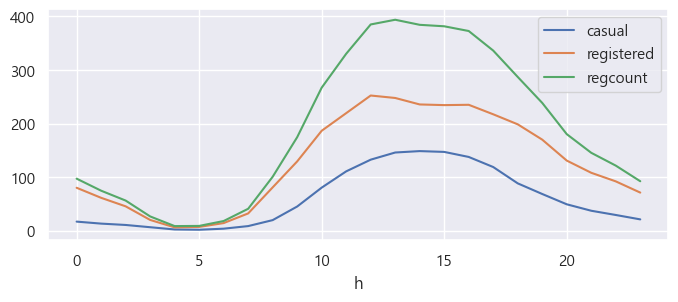

In [62]:
temp0 = tr[tr['date_type']==0].groupby("h")[['casual', 'registered', 'regcount']].mean()
print( temp0 )
temp0.plot(figsize=(8,3))
plt.show()

### 평일

       casual  registered    regcount
h                                    
0    7.174194   29.558065   36.732258
1    3.446602   12.556634   16.003236
2    2.101639    6.334426    8.436066
3    0.878893    4.013841    4.892734
4    0.734007    4.629630    5.363636
5    1.287097   23.241935   24.529032
6    4.280645   98.296774  102.577419
7   11.941935  278.748387  290.690323
8   22.045161  457.900000  479.945161
9   24.045161  218.248387  242.293548
10  30.209677  103.387097  133.596774
11  37.100000  119.919355  157.019355
12  40.408360  158.938907  199.347267
13  42.215434  154.945338  197.160772
14  44.681672  135.684887  180.366559
15  45.180064  153.446945  198.627010
16  47.745981  244.720257  292.466238
17  56.508039  472.700965  529.209003
18  49.414791  446.070740  495.485531
19  40.456592  308.826367  349.282958
20  30.591640  218.771704  249.363344
21  24.090032  160.765273  184.855305
22  19.266881  119.077170  138.344051
23  13.183280   75.813505   88.996785


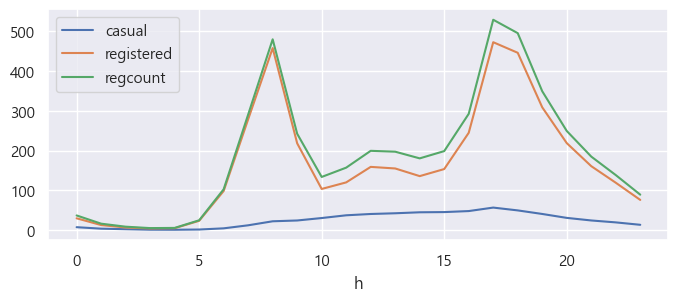

In [63]:
temp0 = tr[tr['date_type']==1].groupby("h")[['casual', 'registered', 'regcount']].mean()
print( temp0 )
temp0.plot(figsize=(8,3))
plt.show()

### 공휴일

        casual  registered    regcount
h                                     
0    17.000000   49.769231   66.769231
1    10.538462   32.692308   43.230769
2     9.076923   18.923077   28.000000
3     3.333333    9.083333   12.416667
4     2.230769    5.153846    7.384615
5     1.692308   11.538462   13.230769
6     4.230769   34.692308   38.923077
7     9.153846  101.846154  111.000000
8    27.076923  201.923077  229.000000
9    51.000000  160.307692  211.307692
10   76.846154  153.692308  230.538462
11   91.615385  183.230769  274.846154
12  100.615385  217.769231  318.384615
13  105.076923  221.307692  326.384615
14  108.153846  212.923077  321.076923
15   91.769231  201.000000  292.769231
16   92.846154  222.000000  314.846154
17   86.923077  281.076923  368.000000
18   73.384615  271.153846  344.538462
19   57.230769  223.000000  280.230769
20   55.461538  163.692308  219.153846
21   46.923077  134.923077  181.846154
22   33.307692  108.076923  141.384615
23   11.769231   60.69230

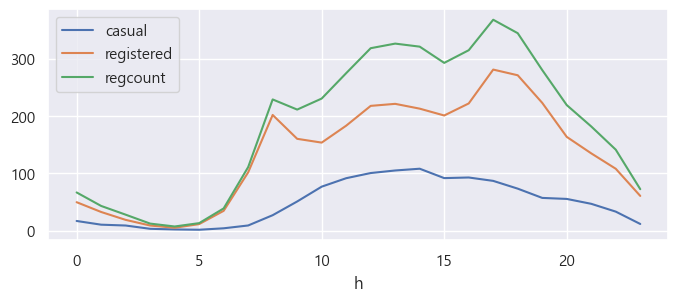

In [64]:
temp0 = tr[tr['date_type']==2].groupby("h")[['casual', 'registered', 'regcount']].mean()
print( temp0 )
temp0.plot(figsize=(8,3))
plt.show()

### 주말 평일 공휴일

date_type           0           1           2
h                                            
0           97.219697   36.732258   66.769231
1           74.734848   16.003236   43.230769
2           56.323077    8.436066   28.000000
3           26.727273    4.892734   12.416667
4            8.659091    5.363636    7.384615
5            8.984496   24.529032   13.230769
6           18.128788  102.577419   38.923077
7           40.992424  290.690323  111.000000
8          100.757576  479.945161  229.000000
9          174.636364  242.293548  211.307692
10         267.083333  133.596774  230.538462
11         330.363636  157.019355  274.846154
12         385.090909  199.347267  318.384615
13         393.871212  197.160772  326.384615
14         384.409091  180.366559  321.076923
15         381.674242  198.627010  292.769231
16         372.848485  292.466238  314.846154
17         336.280303  529.209003  368.000000
18         287.098485  495.485531  344.538462
19         238.613636  349.282958 

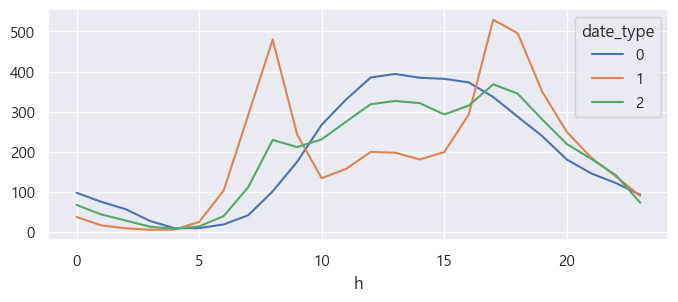

In [65]:
temp = tr.pivot_table(index="h", columns="date_type", values="regcount")
print( temp ) 
temp.plot(figsize=(8,3))
plt.show()

date_type           0           1           2
h                                            
0           80.196970   29.558065   49.769231
1           61.439394   12.556634   32.692308
2           45.553846    6.334426   18.923077
3           20.159091    4.013841    9.083333
4            6.303030    4.629630    5.153846
5            7.147287   23.241935   11.538462
6           14.295455   98.296774   34.692308
7           32.318182  278.748387  101.846154
8           80.939394  457.900000  201.923077
9          129.424242  218.248387  160.307692
10         186.628788  103.387097  153.692308
11         219.515152  119.919355  183.230769
12         252.424242  158.938907  217.769231
13         247.840909  154.945338  221.307692
14         235.750000  135.684887  212.923077
15         234.515152  153.446945  201.000000
16         235.106061  244.720257  222.000000
17         217.363636  472.700965  281.076923
18         198.651515  446.070740  271.153846
19         170.037879  308.826367 

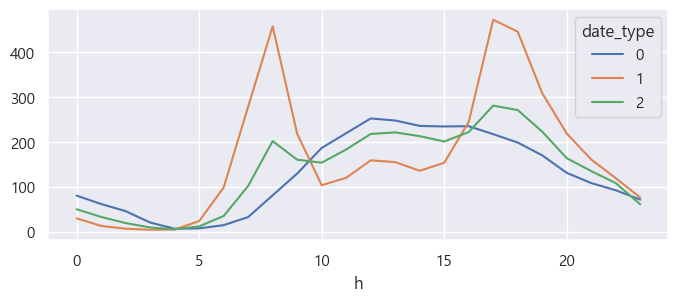

In [66]:
temp = tr.pivot_table(index="h", columns="date_type", values="registered")
print( temp ) 
temp.plot(figsize=(8,3))
plt.show()

date_type           0          1           2
h                                           
0           17.022727   7.174194   17.000000
1           13.295455   3.446602   10.538462
2           10.769231   2.101639    9.076923
3            6.568182   0.878893    3.333333
4            2.356061   0.734007    2.230769
5            1.837209   1.287097    1.692308
6            3.833333   4.280645    4.230769
7            8.674242  11.941935    9.153846
8           19.818182  22.045161   27.076923
9           45.212121  24.045161   51.000000
10          80.454545  30.209677   76.846154
11         110.848485  37.100000   91.615385
12         132.666667  40.408360  100.615385
13         146.030303  42.215434  105.076923
14         148.659091  44.681672  108.153846
15         147.159091  45.180064   91.769231
16         137.742424  47.745981   92.846154
17         118.916667  56.508039   86.923077
18          88.446970  49.414791   73.384615
19          68.575758  40.456592   57.230769
20        

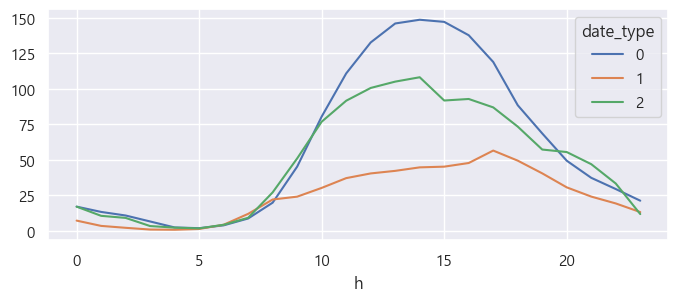

In [67]:
temp = tr.pivot_table(index="h", columns="date_type", values="casual")
print( temp ) 
temp.plot(figsize=(8,3))
plt.show()

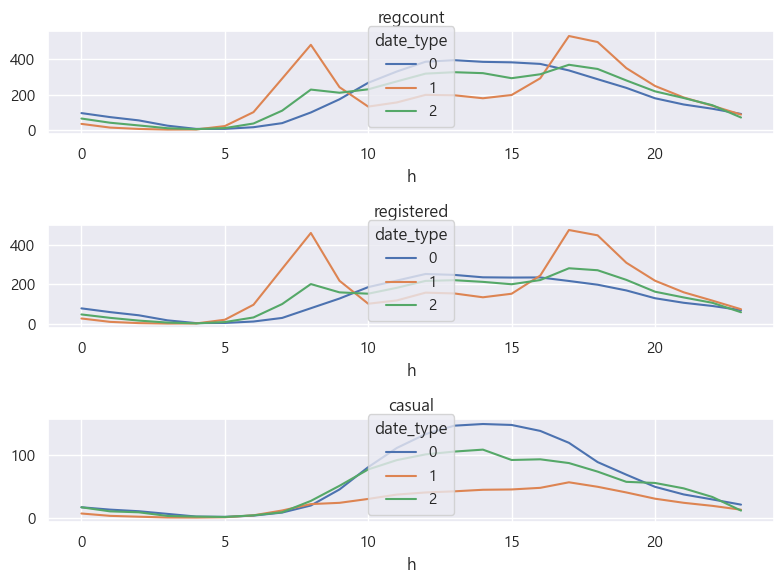

In [68]:
ax1 = plt.subplot(3,1,1)
temp = tr.pivot_table(index="h", columns="date_type", values="regcount")
ax1.set_title("regcount")
temp.plot(figsize=(8,6), ax=ax1)

ax2 = plt.subplot(3,1,2)
ax2.set_title("registered")
temp = tr.pivot_table(index="h", columns="date_type", values="registered")
temp.plot(figsize=(8,6), ax=ax2)

ax3 = plt.subplot(3,1,3)
ax3.set_title("casual")
temp = tr.pivot_table(index="h", columns="date_type", values="casual")
temp.plot(figsize=(8,6), ax=ax3)


plt.tight_layout()
plt.show()


In [75]:
# ax1 = plt.subplot(3,1,1)
# temp = tr.pivot_table(index="week", columns="date_type", values="regcount")
# ax1.set_title("regcount")
# sns.lineplot(figsize=(8,6),hue = 'date_type', ax=ax1)

# ax2 = plt.subplot(3,1,2)
# ax2.set_title("registered")
# temp = tr.pivot_table(index="week", columns="date_type", values="registered")
# sns.lineplot(figsize=(8,6),hue = 'date_type', ax=ax2)

# ax3 = plt.subplot(3,1,3)
# ax3.set_title("casual")
# temp = tr.pivot_table(index="week", columns="date_type", values="casual")
# sns.lineplot(figsize=(8,6),hue = 'date_type', ax=ax3)


# plt.tight_layout()
# plt.show()

<AxesSubplot: xlabel='week', ylabel='regcount'>

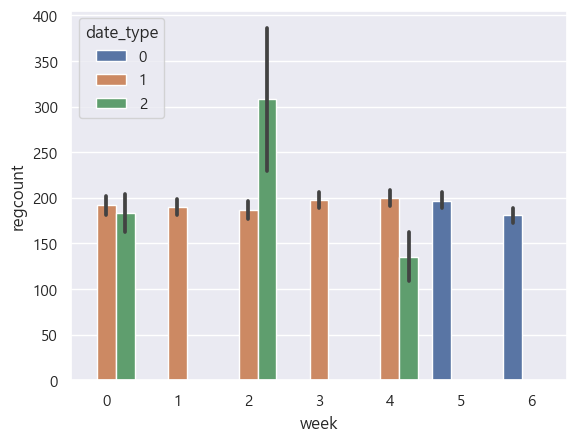

In [83]:
sns.barplot(data = tr, x='week' , y= 'regcount', hue = 'date_type')
sns.barplot(data = tr, x='week' , y= 'registered', hue = 'date_type')
sns.barplot(data = tr, x='week' , y= 'casual', hue = 'date_type')

#axe지정

# 월 별 대여수

# 계절성 피쳐

In [84]:
tr.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'regcount', 'y', 'm',
       'd', 'h', 'week', 'date_type', 'day_type1', 'date_type2'],
      dtype='object')

In [99]:
sss=tr[['weather', 'temp', 'atemp',
       'humidity', 'windspeed','casual','regcount','registered','season']].corr()


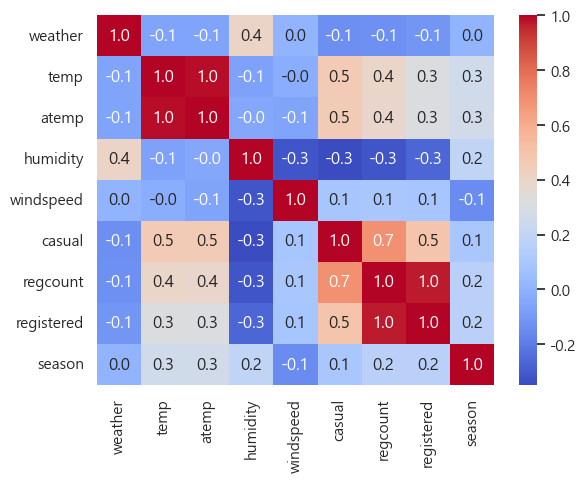

In [100]:


sns.heatmap(  
                data=sss,
                cmap='coolwarm',  #'Blues', 
                annot=True, fmt='.1f', 
                cbar=True
               )
plt.show()

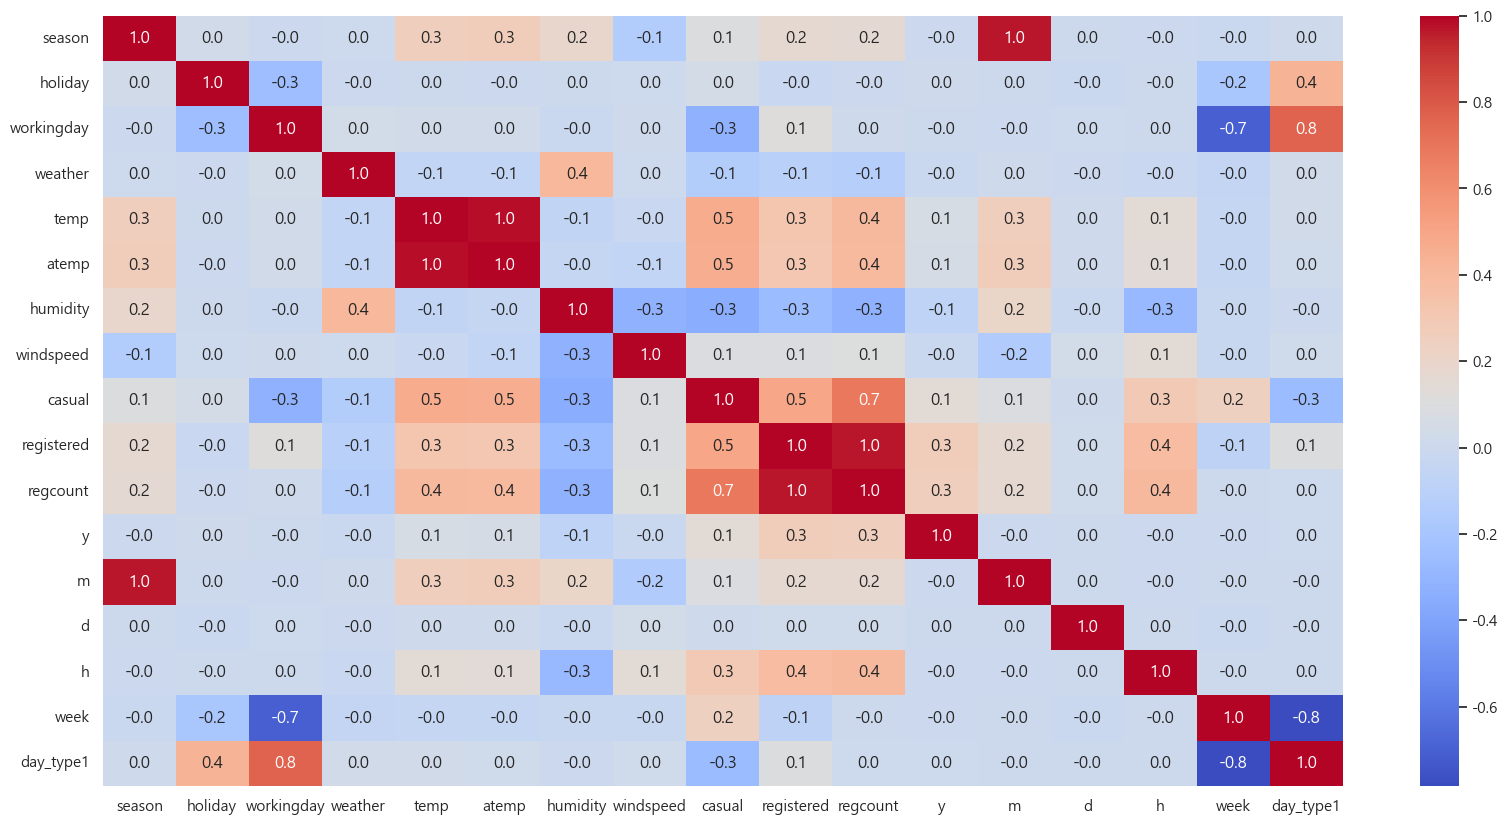

In [101]:
plt.figure(figsize=(20,10))
sns.heatmap(  
                data=tr.corr(),
                cmap='coolwarm',  #'Blues', 
                annot=True, fmt='.1f', 
                cbar=True
               )
plt.show()

* 월이나 시간 단위로 temp

In [102]:
tr['temp'].shape

(10886,)

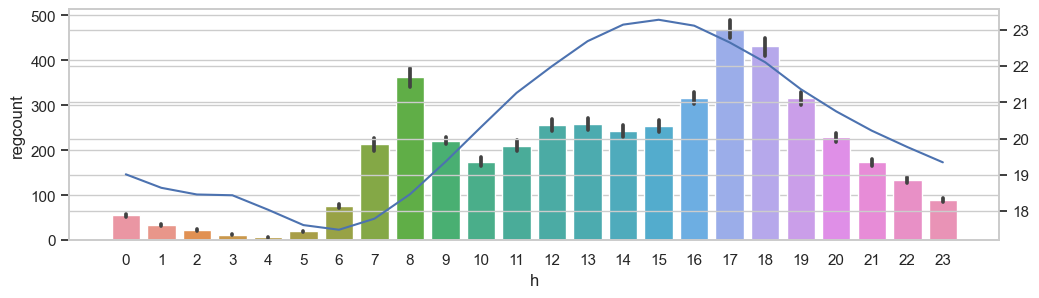

In [108]:
fig, axes = plt.subplots(figsize = (12,3))
sns.barplot(data = tr, x = 'h',y='regcount',ax=axes)
axes2 = axes.twinx()
axes2.plot(tr.groupby('h')[['temp']].mean())


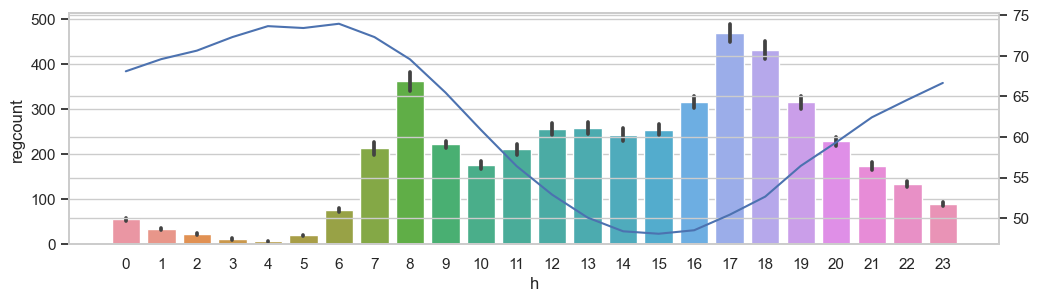

In [109]:
fig, axes = plt.subplots(figsize = (12,3))
sns.barplot(data = tr, x = 'h',y='regcount',ax=axes)
axes2 = axes.twinx()
axes2.plot(tr.groupby('h')[['humidity']].mean())


<pre>

weather
1: 맑음, 약간 구름, 부분 흐림, 부분 흐림
2: 안개 + 흐림, 안개 + 부서진 구름, 안개 + 약간 구름, 안개
3: 가벼운 눈, 약한 비 + 뇌우 + 흩어진 구름, 약한 비 + 흩어진 구름
4: 폭우 + 얼음 팔레트 + 뇌우 + 안개, 눈 + 안개 

</pre>

In [111]:
tr['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64